# Milestone 1

```txt
Adnan Rio
Batch 14
```

## Description

### Objective

```txt
Departemen Pengawasan Lalu Lintas Kementerian Perhubungan Amerika Serikat ingin mengetahui kondisi kasus kecelakaan yang terjadi di jalan selama tahun 2016 yang berguna untuk diterapkan kebijakan baru supaya dapat mengurangi angka kecelakaan di kemudian hari
```

### Problem Statement

```txt
1.  Pada state_name mana dengan jumlah angka kecelakaan paling tinggi?
2.  Kecelakan lebih banyak terjadi di land_use_name Urban atau Rural ?
3.  Pada hour_of_crash berapa kecelakaan sering terjadi?
4.  Kecelakaan paling sering dialami oleh body_type_name apa?
5.  Pada land_use_name urban berapa mean angka fatalitynya?
6.  Apakah ada perbedaan signifikan mean angka fatality pada land_use_name Urban (perkotaan) dengan land_use_name Rural (pedesaan)?
```

# URL Deployment Heroku
https://h8dsft-milestone1-adnanrio.herokuapp.com/

# Impot Pustaka

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Loading & Queries


### Query yang telah dibuat di Google Cloud Platform

 ```txt
SELECT  
accident.state_name,
accident.land_use_name,
accident.hour_of_crash, 
accident.atmospheric_conditions_name, 
vehicle.body_type_name, 
accident.number_of_fatalities
from `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` AS accident
INNER JOIN `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016` AS vehicle
ON accident.consecutive_number = vehicle.consecutive_number
WHERE accident.land_use_name in ('Rural', 'Urban')
AND accident.state_name IS NOT NULL 
AND accident.land_use_name IS NOT NULL
AND accident.hour_of_crash IS NOT NULL
AND accident.atmospheric_conditions_name IS NOT NULL
AND vehicle.body_type_name IS NOT NULL
AND accident.number_of_fatalities IS NOT NULL;
```

In [2]:
df=pd.read_csv('h8dsft_P0ML1_adnan_rio.csv')

In [12]:
df

,state_name,land_use_name,hour_of_crash,atmospheric_conditions_name,consecutive_number,body_type_name,number_of_fatalities
0,Wyoming,Rural,3,Snow,560099,Standard Pickup,1
1,Idaho,Rural,16,Blowing Snow,160226,Utility Station Wagon,2
2,Arkansas,Urban,3,Clear,50006,Standard Pickup,1
3,Texas,Urban,15,Clear,482027,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
4,Florida,Urban,19,Clear,121570,Compact Utility (ANSI D-16 Utility Vehicle Cat...,1
...,...,...,...,...,...,...,...
52580,Virginia,Urban,15,Not Reported,510436,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
52581,New Mexico,Urban,14,Clear,350309,Motorcycle,1
52582,Arizona,Rural,14,Not Reported,40777,ATV (All-Terrain Vehicle; Includes 3 or 4 Wheels),1
52583,Washington,Urban,3,Not Reported,530422,Unknown Body Type,1


In [32]:
df.head(5) # Melihat 5 data teratas

,state_name,land_use_name,hour_of_crash,atmospheric_conditions_name,consecutive_number,body_type_name,number_of_fatalities
0,Wyoming,Rural,3,Snow,560099,Standard Pickup,1
1,Idaho,Rural,16,Blowing Snow,160226,Utility Station Wagon,2
2,Arkansas,Urban,3,Clear,50006,Standard Pickup,1
3,Texas,Urban,15,Clear,482027,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
4,Florida,Urban,19,Clear,121570,Compact Utility (ANSI D-16 Utility Vehicle Cat...,1


In [33]:
df.tail()  # Melihat 5 data terbawah

,state_name,land_use_name,hour_of_crash,atmospheric_conditions_name,consecutive_number,body_type_name,number_of_fatalities
52580,Virginia,Urban,15,Not Reported,510436,Large Utility (ANSI D-16 Utility Vehicle Categ...,1
52581,New Mexico,Urban,14,Clear,350309,Motorcycle,1
52582,Arizona,Rural,14,Not Reported,40777,ATV (All-Terrain Vehicle; Includes 3 or 4 Wheels),1
52583,Washington,Urban,3,Not Reported,530422,Unknown Body Type,1
52584,Arizona,Rural,18,Not Reported,40096,Standard Pickup,1


In [8]:
df.shape

(52585, 6)

# Data Cleaning

In [24]:
df.info() # Mengecek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state_name                   52585 non-null  object
 1   land_use_name                52585 non-null  object
 2   hour_of_crash                52585 non-null  int64 
 3   atmospheric_conditions_name  52585 non-null  object
 4   consecutive_number           52585 non-null  int64 
 5   body_type_name               52585 non-null  object
 6   number_of_fatalities         52585 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.8+ MB


In [ ]:
for col in df:
  missing_value = df[col].isnull().sum()
  print(col, ' : ', missing_value)

Dari code diatas bahwa dataset tidak memiliki nilai missing value, karena itu tidak diperlukannya proses cleaning data.

# Data Exploration

<AxesSubplot:xlabel='state_name'>

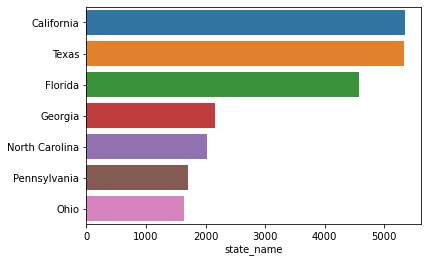

In [5]:
# stat_name jumlah kecelakaan paling tinggi
crash_freq = df['state_name'].value_counts().head(7)
sns.barplot(x=crash_freq, y=crash_freq.index, orient='h')

<AxesSubplot:ylabel='land_use_name'>

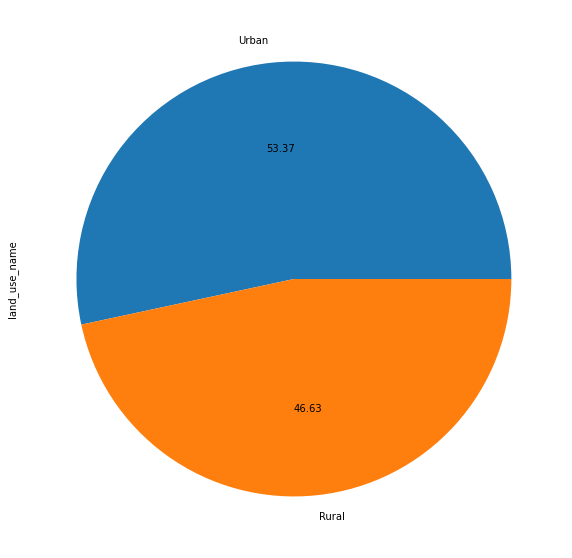

In [28]:
# Perbandingan antara Urban dan Rural
df['land_use_name'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

Berdasarkan pie chart 53.37% kecelakaan terjadi di land_use_name urban (perkotaan) dan sisanya terjadi di land_use_name rural (pedesaan)

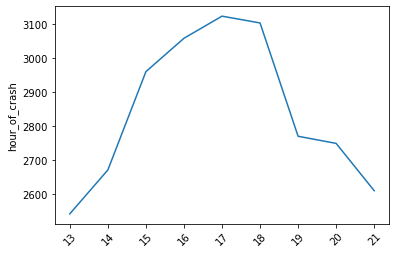

In [29]:
# Frekeunsi hour_of_crash kecelakaan paling tinggi
hour_of_crash = df['hour_of_crash'].value_counts().head(9)
sns.lineplot(x=hour_of_crash .index ,y=hour_of_crash)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

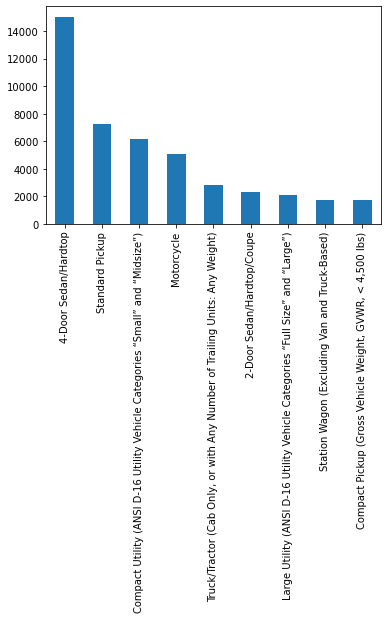

In [31]:
# Frekuensi body_type_name kecelakaan paling tinggi
df['body_type_name'].value_counts().head(9).plot(kind='bar')

In [37]:
# Frekuensi number_of_fatalities pada setiap land_use_name
EDA_land_fata = df.drop(['state_name','hour_of_crash','consecutive_number','body_type_name'], axis=1)
EDA_land_fata

,land_use_name,atmospheric_conditions_name,number_of_fatalities
0,Rural,Snow,1
1,Rural,Blowing Snow,2
2,Urban,Clear,1
3,Urban,Clear,1
4,Urban,Clear,1
...,...,...,...
52580,Urban,Not Reported,1
52581,Urban,Clear,1
52582,Rural,Not Reported,1
52583,Urban,Not Reported,1


In [39]:
EDA_land_name_urban = EDA_land_fata[EDA_land_fata['land_use_name'] == 'Urban'].groupby('atmospheric_conditions_name').sum() # groupby atmospheric_conditions_name pada land_use_name Urban agar mendapatkan nilai number_of_fatalities
EDA_land_name_urban

,number_of_fatalities
atmospheric_conditions_name,
"Blowing Sand, Soil, Dirt",4
Clear,22500
Cloudy,4361
"Fog, Smog, Smoke",161
Freezing Rain or Drizzle,12
Not Reported,1156
Other,52
Rain,1790
Severe Crosswinds,17


In [40]:
print('Mean nilai kematian: {}'.format(np.round(EDA_land_name_urban.number_of_fatalities.mean())))
print('Median nilai kematian: {}'.format(np.round(EDA_land_name_urban.number_of_fatalities.median())))
print('Modus nilai kematian: {}'.format(np.round(EDA_land_name_urban.number_of_fatalities.mode())))

Mean nilai kematian: 2530.0
Median nilai kematian: 114.0
Modus nilai kematian: 0         4
1        12
2        17
3        34
4        52
5        67
6       161
7       208
8      1156
9      1790
10     4361
11    22500
Name: number_of_fatalities, dtype: int64


Hasil mean nilai kematian di land_use_name urban pada tahun 2016 sebesar 2530

Uji hipotesis 

H0: μ_Urban == μ_Rural
H1: μ_Urban != μ_Rural

In [42]:
# uji two sample independent
Rural = EDA_land_fata[EDA_land_fata['land_use_name'] == 'Rural'].groupby('atmospheric_conditions_name').sum() # groupby atmospheric_conditions_name  agar mendapatkan nilai angka kematian
Urban = EDA_land_fata[EDA_land_fata['land_use_name'] == 'Urban'].groupby('atmospheric_conditions_name').sum() # groupby atmospheric_conditions_name agar mendapatkan nilai angka kematian

t_stat, p_val = stats.ttest_ind(Urban,Rural)
print('P-value:',p_val) 

P-value: [0.87695144]


Menunjukan tidak ada perbedaan rata-rata fatality antara land_use_name urban dengan land_use_name rural

# Kesimpulan

-   Dari keseluruhan state_name Amerika serikat, California menduduki posisi pertama dengan tingkat kecelakaan tertinggi dengan lebih dari 5000 kasus yang terjadi, posisi kedua ditempati  texas dengan hasil yang sangat mendekati california, urutan ketiga hingga ketujuh berturut-turut ditempati oleh florida, georgia, north carolina, pennsylvania, ohio.

-   Dari land_use_name ini kami melakukan penelitian dan mendapatkan hasil bahwa kecelakaan yang terjadi lebih banyak di land_use_name urban (perkotaan) 53.37% dibanding dengan land_use_name rural (pedesaan) 46.63%. Dimana angka tertinggi kecelakaan terjadi pada pukul 17.00, waktu tersebut merupakan puncak mobilitas orang setelah bekerja. Kecelakaan yang terjadi di dominasi oleh body_type_name 4-Door Sedan/Hardtop dengan lebih dari 14000 kejadian, posisi ke dua ditempati Standard Pickup, posisi ke tiga Compact Utility (ANSI D-16 Utility Vehicle Categories “Small” and “Midsize”) dan posisi ke empat Motorcycle.

-   Perhitungan menunjukan bahwa tidak terdapat perbedaan rata-rata kecelakaan diwilayah urban maupun rural yang signifikan, hal tersebut dapat menjadi pertimbangan pemerintah untuk memberlakukan kebijakan pembatasan kecepatan kendaraan di jam sibuk dan juga memberikan rambu peringatan agar masyarakat lebih berhati-hati dimana kebijakan tersebut bersekala nasional.